## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/worldwide_browser_trends.csv')

In [3]:
df.head()

,Month,Firefox,Safari,Google Chrome,Internet Explorer,Opera
0,2004-01,12,2,2,37,9
1,2004-02,20,2,2,39,9
2,2004-03,18,2,2,34,8
3,2004-04,20,2,2,33,9
4,2004-05,20,2,2,35,9


In [4]:
df.shape

(202, 6)

In [5]:
df.dtypes

Month                object
Firefox               int64
Safari                int64
Google Chrome         int64
Internet Explorer     int64
Opera                 int64
dtype: object

Cambiamos el tipo de dato de la columna Month, a modo datetime de pandas, para facilitar el análisis.

In [6]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)

#Validar
assert df['Month'].dtype == 'datetime64[ns]'

In [7]:
#Para verificar si hay valores duplicados, si no sale algún error, es porque no hay duplicados.
assert df.shape[0] == df.duplicated('Month', keep=False).shape[0]

In [8]:
df.set_index('Month', inplace=True)

In [9]:
df.describe().round(2)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
count,202.00,202.00,202.00,202.00,202.00
mean,37.86,3.67,24.48,15.23,9.79
std,23.64,1.38,17.74,10.13,4.68
min,5.00,2.00,1.00,2.00,3.00
25%,11.00,2.00,2.00,4.00,5.25
50%,37.50,4.00,24.00,14.00,10.00
75%,59.75,5.00,43.75,23.00,14.00
max,100.00,8.00,56.00,39.00,19.00


El rating, debería ir desde valores de 0 a 100, por lo cual todos los datos cumplen con estos parámetros.

Ademas podemos ver que el navegador que tuvo una mayor popularidad en algún tiempo específico fue ***Firefox***, alcanzando los 100 puntos, y en caso contrario, el menos popular de este rango de fechas entre 2004 fecha de hoy es ***Safari***.

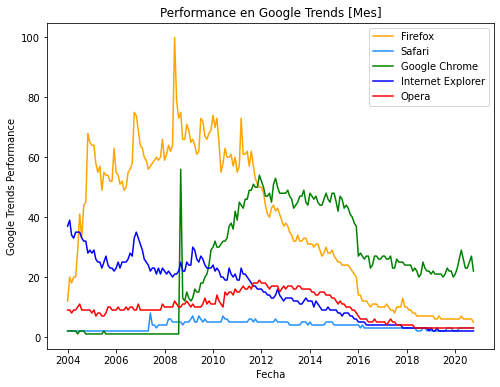

In [10]:
navegadores = df.columns
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df.index, df['Firefox'], color='Orange', label='Firefox')
ax.plot(df.index, df['Safari'], color='dodgerBlue', label='Safari')
ax.plot(df.index, df['Google Chrome'], color='Green', label='Google Chrome')
ax.plot(df.index, df['Internet Explorer'], color='Blue', label='Internet Explorer')
ax.plot(df.index, df['Opera'], color='Red', label='Opera')
ax.set(xlabel='Fecha',
      ylabel='Google Trends Performance',
      title='Performance en Google Trends [Mes]')
ax.legend()
plt.show()

Se observa que el navegador que más tiempo dominó el mercado de los navegadores más buscados en Google, fué Firefox, entre los años 2004 al 2012 aproximadamente, sin embargo en la actualidad, quien tiene el mayor resultado en búsquedas, es Google Chrome.

Por otra parte, el navegador que históricamente se ha buscado menos es Safari, probablemente porque está relacionado solo a la marca Apple y eso le quita mucho mercado.

## Rolling average (media movil).

In [11]:
rolling_six = df.rolling(window=6, on=df.index).mean()

In [12]:
rolling_six.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN
2004-04-01,NaN,NaN,NaN,NaN,NaN
2004-05-01,NaN,NaN,NaN,NaN,NaN
2004-06-01,19.833333,2.0,1.833333,35.500000,9.000000
2004-07-01,24.666667,2.0,1.833333,35.166667,9.333333
2004-08-01,26.833333,2.0,1.833333,34.166667,9.333333
2004-09-01,31.166667,2.0,1.833333,33.833333,9.500000


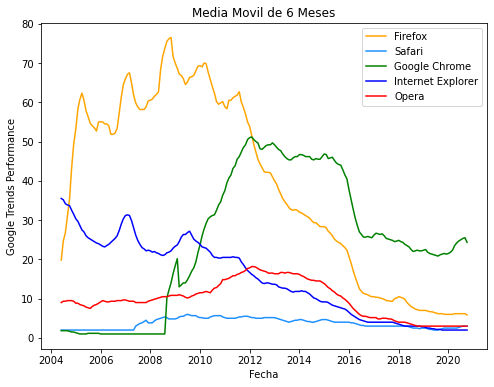

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(rolling_six.index, rolling_six['Firefox'], color='Orange', label='Firefox')
ax.plot(rolling_six.index, rolling_six['Safari'], color='dodgerBlue', label='Safari')
ax.plot(rolling_six.index, rolling_six['Google Chrome'], color='Green', label='Google Chrome')
ax.plot(rolling_six.index, rolling_six['Internet Explorer'], color='Blue', label='Internet Explorer')
ax.plot(rolling_six.index, rolling_six['Opera'], color='Red', label='Opera')
ax.set(xlabel='Fecha',
      ylabel='Google Trends Performance',
      title='Media Movil de 6 Meses')
ax.legend()
plt.show()

## Percentage from the previous quarter (cambio porcentual respecto al trimestre anterior).

In [14]:
pct_change_quarterly = df.pct_change(periods=3, freq='MS')*100
pct_change_quarterly = pct_change_quarterly.loc['2009-01-01':]

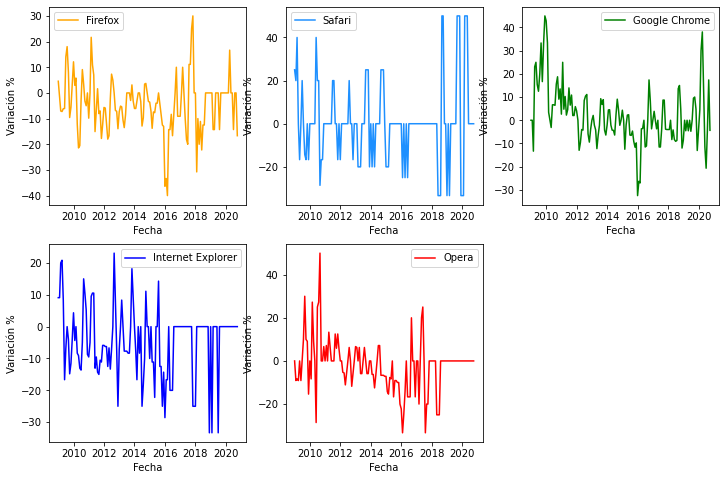

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(12,8))
ax[0,0].plot(pct_change_quarterly.index, pct_change_quarterly['Firefox'], color='Orange', label='Firefox')
ax[0,0].set(xlabel='Fecha', ylabel='Variación %')
ax[0,0].legend(loc='best')

ax[0,1].plot(pct_change_quarterly.index, pct_change_quarterly['Safari'], color='dodgerBlue', label='Safari')
ax[0,1].set(xlabel='Fecha', ylabel='Variación %')
ax[0,1].legend(loc='best')

ax[0,2].plot(pct_change_quarterly.index, pct_change_quarterly['Google Chrome'], color='Green', label='Google Chrome')
ax[0,2].set(xlabel='Fecha', ylabel='Variación %')
ax[0,2].legend(loc='best')

ax[1,0].plot(pct_change_quarterly.index, pct_change_quarterly['Internet Explorer'], color='Blue', label='Internet Explorer')
ax[1,0].set(xlabel='Fecha', ylabel='Variación %')
ax[1,0].legend(loc='best')

ax[1,1].plot(pct_change_quarterly.index, pct_change_quarterly['Opera'], color='Red', label='Opera')
ax[1,1].set(xlabel='Fecha', ylabel='Variación %')
ax[1,1].legend(loc='best')

fig.delaxes(ax[1,2])
plt.show()

## Annual Google Trends performance in 2009, 2012, 2015 and 2018

In [16]:
chrome_trends = pd.DataFrame()

for year in ['2009', '2012', '2015', '2018']:
    trends_per_year = df.loc[year, ['Google Chrome']].reset_index(drop=True)
    trends_per_year.rename(columns={'Google Chrome':year}, inplace = True)
    chrome_trends = pd.concat([chrome_trends, trends_per_year], axis=1)

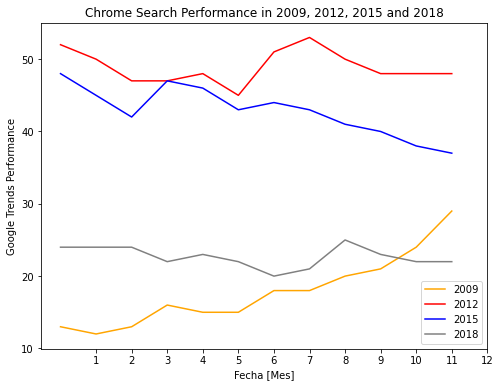

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(chrome_trends.index, chrome_trends['2009'], color='Orange', label='2009')
ax.plot(chrome_trends.index, chrome_trends['2012'], color='Red', label='2012')
ax.plot(chrome_trends.index, chrome_trends['2015'], color='Blue', label='2015')
ax.plot(chrome_trends.index, chrome_trends['2018'], color='Grey', label='2018')
ax.set(xticks=[1,2,3,4,5,6,7,8,9,10,11,12],
      xlabel='Fecha [Mes]',
      ylabel='Google Trends Performance',
      title='Chrome Search Performance in 2009, 2012, 2015 and 2018')
ax.legend()
plt.show()

Google Chorme se lanzo tardemente el año 2008, por lo que lo que nos muestra el gráfico, es que a penas se lanzó, se asomó tímidamente en la aparición de búsquedas, aumentando constantemente, luego al año el 2012 causó mucho revuelo posicionandose como su mejor época, luego cominza a decaes lentamente al 2018 y sigue decayendo al 2018.